# Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta, date
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
date.today()

datetime.date(2024, 5, 27)

# define the dates to fetch data

In [13]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print(start_date, end_date)

2023-05-28 2024-05-27


In [50]:
# define the ticker
ticker = 'GOOGL'
df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-30,125.639999,125.660004,122.000000,123.669998,123.669998,35076700
2023-05-31,122.750000,124.059998,122.500000,122.870003,122.870003,37325800
2023-06-01,122.820000,124.419998,122.620003,123.720001,123.720001,30772700
2023-06-02,123.989998,126.150002,123.760002,124.669998,124.669998,26963100
2023-06-05,124.010002,127.430000,123.839996,126.010002,126.010002,32305500


In [51]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,138.639880,140.126720,137.387200,138.821120,138.821120,2.937055e+07
std,13.586024,13.675716,13.531080,13.698331,13.698331,1.072931e+07
min,116.290001,117.709999,115.349998,116.449997,116.449997,1.251430e+07
25%,129.807503,131.442497,128.832497,129.805000,129.805000,2.279398e+07
50%,136.274994,137.934998,135.169998,136.455002,136.455002,2.657645e+07
75%,144.754997,145.582497,143.625000,144.880001,144.880001,3.223780e+07
max,177.070007,178.770004,176.080002,177.850006,177.850006,8.436620e+07


In [52]:
df["Date"] = df.index
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2023-05-30,125.639999,125.660004,122.000000,123.669998,123.669998,35076700,2023-05-30
2023-05-31,122.750000,124.059998,122.500000,122.870003,122.870003,37325800,2023-05-31
2023-06-01,122.820000,124.419998,122.620003,123.720001,123.720001,30772700,2023-06-01
2023-06-02,123.989998,126.150002,123.760002,124.669998,124.669998,26963100,2023-06-02
2023-06-05,124.010002,127.430000,123.839996,126.010002,126.010002,32305500,2023-06-05


In [55]:
#df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       250 non-null    float64       
 1   High       250 non-null    float64       
 2   Low        250 non-null    float64       
 3   Close      250 non-null    float64       
 4   Adj Close  250 non-null    float64       
 5   Volume     250 non-null    int64         
 6   Date       250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


In [56]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2023-05-30,123.669998
1,2023-05-31,122.870003
2,2023-06-01,123.720001
3,2023-06-02,124.669998
4,2023-06-05,126.010002


In [57]:
#plot the data
fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
fig.show()

In [59]:
# stationarity check on data
def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistic: ', result[0])
    print('p-value: ', result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("File to Reject the null hypothesis. Data is not stationary")
check_stationarity(df['Close'])

ADF Statistic:  -0.4393841601474447
p-value:  0.9033124608159464
File to Reject the null hypothesis. Data is not stationary


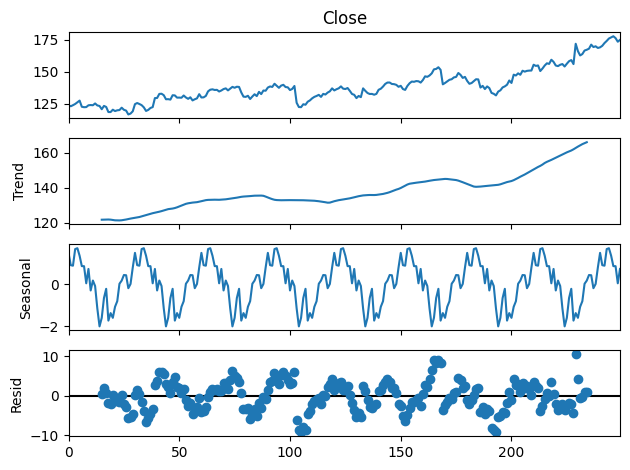

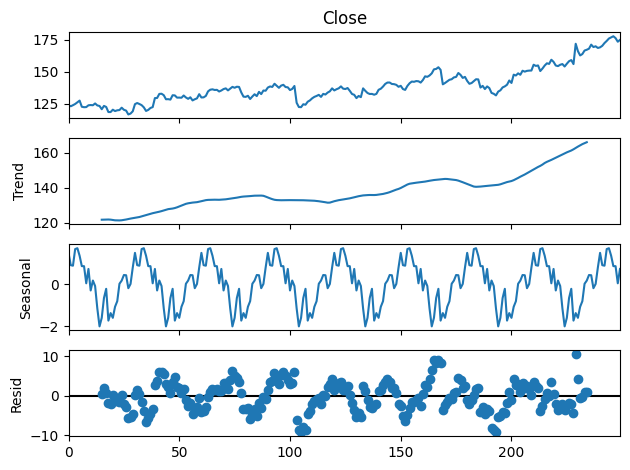

In [60]:
# decompose the data to see trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

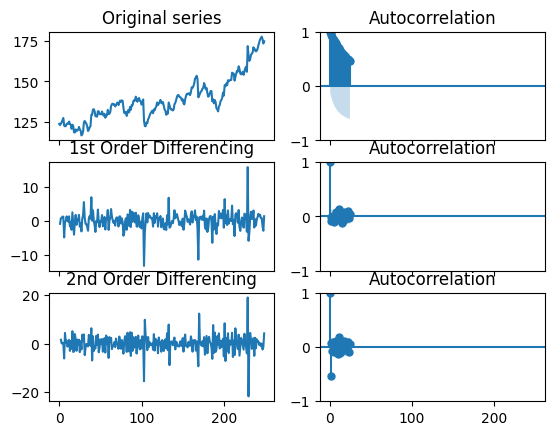

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#original series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original series')
plot_acf(df['Close'], ax=axes[0, 1])

#1st difference
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

#2nd difference
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

# d = 1

# Lets find p value

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

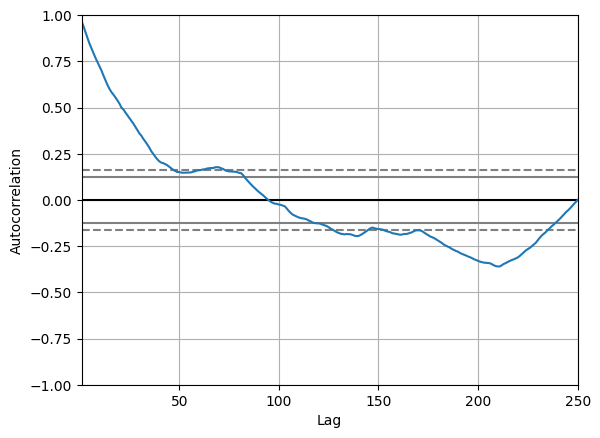

In [66]:
#plots
pd.plotting.autocorrelation_plot(df['Close'])

           0
0   1.000000
1   0.966820
2   0.936942
3   0.905002
4   0.874165
5   0.843807
6   0.817989
7   0.793388
8   0.767303
9   0.744100
10  0.720698
11  0.699050
12  0.671458
13  0.646900
14  0.621184
15  0.600142
16  0.582696
17  0.568983
18  0.554009
19  0.537908
20  0.520682
21  0.499195
22  0.488869
23  0.472692


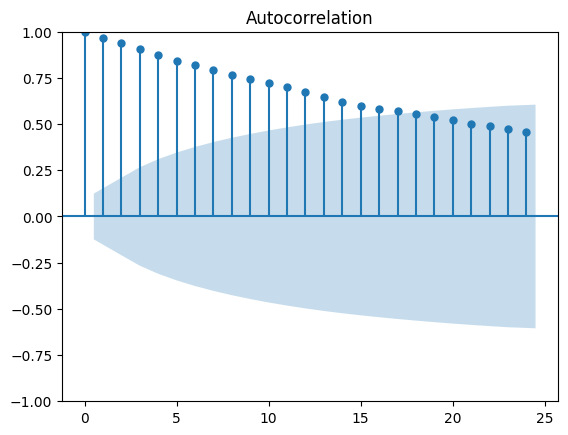

In [68]:
plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

# p = 2

# Lets find q value

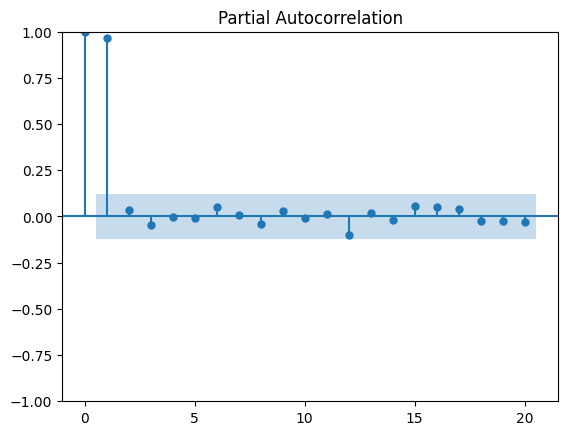

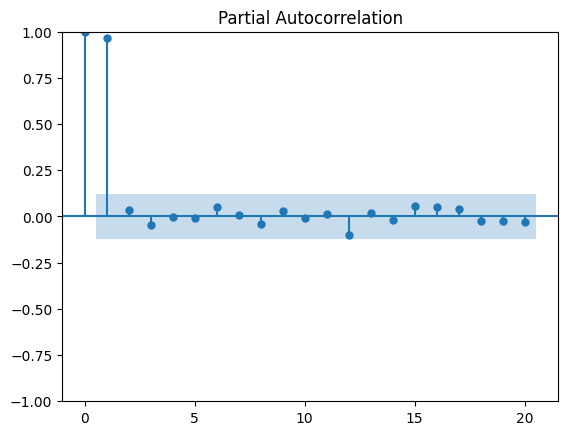

In [69]:
#partial autocorrelation
plot_pacf(df['Close'], lags=20, alpha=0.05)

# q = 2

In [71]:
# lets define d, p, q
d = 1
p = 2
p = 2

In [74]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Close'], 
                    start_p=1, 
                    start_q=1,
                    max_p=2,
                    max_1=2,
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=1,
                    D=1,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1296.030, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1202.247, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1293.981, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1193.100, Time=0.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1192.676, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1201.898, Time=0.05 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1192.995, Time=0.19 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1194.943, Time=0.37 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1194.5

In [75]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  250
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -593.338
Date:                            Tue, 28 May 2024   AIC                           1192.676
Time:                                    00:04:43   BIC                           1203.080
Sample:                                         0   HQIC                          1196.870
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7220      0.057    -12.723      0.000      -0.833      -0.611
ar.S.L24      -0.2332      0.055   

In [76]:
model1 = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -581.995
Date:                Tue, 28 May 2024   AIC                           1165.989
Time:                        00:06:53   BIC                           1169.507
Sample:                             0   HQIC                          1167.405
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.2763      0.229     27.422      0.000       5.828       6.725
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):              1082.95
Prob(Q):                              0.20   Pr

In [78]:
#stats model and ARIMA
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2
model2 = ARIMA(df['Close'], order=(p, d, q))
model2 = model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -580.620
Date:                Tue, 28 May 2024   AIC                           1171.241
Time:                        00:10:48   BIC                           1188.828
Sample:                             0   HQIC                          1178.320
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1512      1.000      0.151      0.880      -1.808       2.111
ar.L2          0.5194      0.648      0.802      0.423      -0.750       1.789
ma.L1         -0.2390      1.006     -0.238      0.8

c:\Users\jeetu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\jeetu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [83]:
#forecast next 30 days
forecast = model2.predict(len(df['Close']), len(df['Close'])+30)
print(forecast)

250    174.800297
251    174.805960
252    174.708286
253    174.696458
254    174.643941
255    174.629856
256    174.600451
257    174.588689
258    174.571638
259    174.562951
260    174.552781
261    174.546732
262    174.540535
263    174.536456
264    174.532621
265    174.529923
266    174.527523
267    174.525759
268    174.524246
269    174.523100
270    174.522141
271    174.521402
272    174.520792
273    174.520315
274    174.519926
275    174.519620
276    174.519372
277    174.519175
278    174.519016
279    174.518890
280    174.518789
Name: predicted_mean, dtype: float64


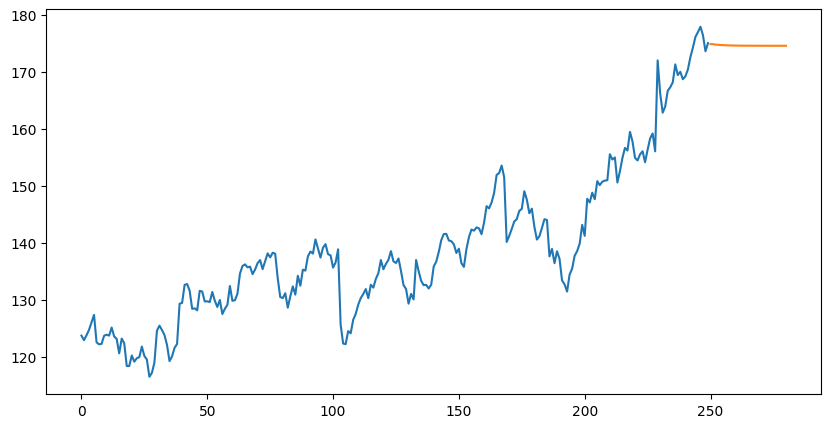

In [84]:
#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [86]:
# let's run SARIMA
import statsmodels.api as sm
import warnings

model_sm = sm.tsa.statespace.SARIMAX(df['Close'],
                                    order=(p, d, q),
                                    seasonal_order=(p, d, q, 12))
model_sm=model_sm.fit()
print(model_sm.summary())

c:\Users\jeetu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\jeetu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -569.655
Date:                            Tue, 28 May 2024   AIC                           1157.310
Time:                                    00:22:06   BIC                           1188.523
Sample:                                         0   HQIC                          1169.891
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1614      1.125      0.143      0.886      -2.044       2.367
ar.L2          0.5440      0.810   

c:\Users\jeetu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



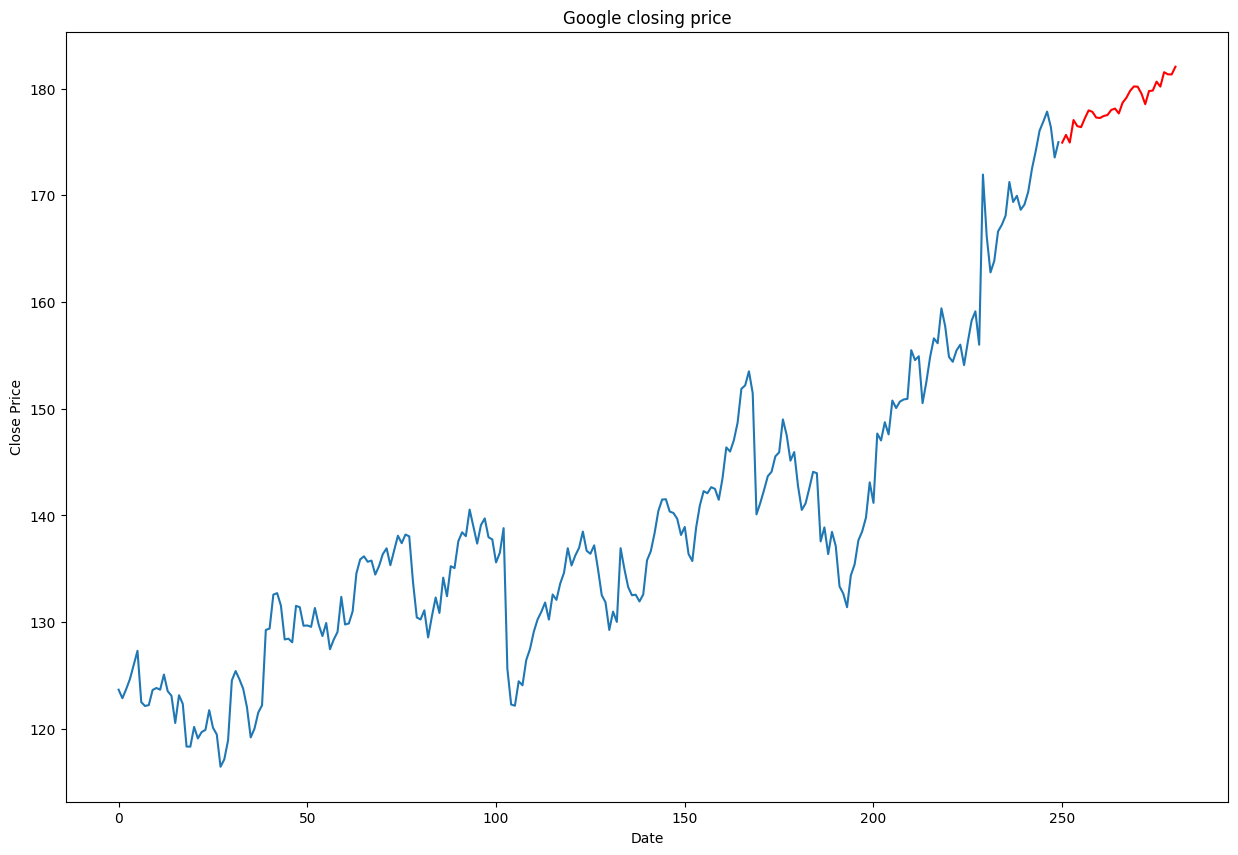

In [87]:
predictions = model_sm.predict(start=len(df['Close']), end=len(df['Close'])+30)

#plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df['Close'], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
plt.show()